# 习题一

<center><font face="楷书"，size=8>Author:孟群康</font></center>
<center><font face="楷书"，size=8>Student_number:2022202020095</font></center>

## 一、题干

分别使用Jacobi和Gauss-Seidel迭代法求解方程组，讨论比较其收敛性
$$
\left[
\begin{matrix}
1 & 2 & -2 \\
1 & 1 & 1 \\
2 & 2 & 1 \\

\end{matrix}
\right]
\left[
\begin{matrix}
x_1 \\
x_2 \\
x_3 \\

\end{matrix}
\right]
=
\left[
\begin{matrix}
6 \\
6 \\
11\end{matrix}
\right]
$$

由于转为PDF之后markdown可能会失效，因此这里再用图片显示一次：![jupyter](./tigan.png)

## 二、具体解法

### 2.1 直接求解解析解

为了比较收敛性，首先直接求出解析解。利用Python sympy库可以直接实现线性方程组的解析求解

In [36]:
import sympy as sp
sp.init_printing()
x_1,x_2,x_3=sp.symbols("x_1,x_2,x_3")

system = sp.Matrix(((1,2,-2,6),(1,1,1,6),(2,2,1,11)))
sp.solve_linear_system(system,x_1,x_2,x_3)

### 2.2 Jacobi迭代求解方程组

Jacobi迭代法是求解线性方程组的迭代法之一。它的基本思路是将方程组拆分为对角线部分和非对角线部分两个矩阵，然后通过迭代的方式逐步逼近线性方程的解。
假设待求解方程组的形式为：

$$ \left\{
\begin{aligned}
a_{11} * x_1 + a_{12} * x_2 + a_{13} * x_3 = b_1\\
a_{21} * x_1 + a_{22} * x_2 + a_{23} * x_3 = b_2\\
a_{31} * x_1 + a_{32} * x_2 + a_{33} * x_3 = b_3
\end{aligned}
\right.
$$
可以表示为向量形式：
$$ AX = B $$




首先，我们需要进行矩阵分解，将系数矩阵$A$分解成一个对角线矩阵$D$和一个非对角线矩阵$R$：

$$D = \left[
\begin{matrix}
a_{11} & 0 & 0\\
0 & a_{12} & 0 \\
0 & 0 & a_{13} \\
\end{matrix}
\right]$$

$$R = \left[
\begin{matrix}
0 & -a_{12} & -a_{13}\\
-a_{21} & 0 & -a_{23} \\
-a_{31} & -a_{32} & 0 \\
\end{matrix}
\right]$$

接下来将方程转变为迭代形式：$$ X_{k+1} = D^{-1} * (B - RX_{k})$$

其中，$X_{k}$表示第$k$次迭代得到的解向量，$X_{k+1}$表示第$k+1$次迭代得到的解向量，$D^{-1}$表示对角线矩阵$D$的逆矩阵。
最后，我们可以通过迭代计算逐步逼近线性方程组的解。迭代停止的条件可以是预设的迭代次数或目标精度。
Python实现代码如下：

In [37]:
def Jacobi_solving(A,b,max_iter=1000,epsilon=1e-10,is_middle_print=False):
    # Initialize the solution x with zeros
    x0 = np.zeros_like(b)
    x = np.zeros_like(b)

    if(is_middle_print):
        print("****** solving ******")

    # Iterate until the maximum number is reached or error is below tolerance
    for i in range(max_iter):
        # Iterate over each component of x in order to update them
        for j in range(len(x)):
            x[j] = (b[j] - np.dot(A[j,:], x0) + A[j,j]*x0[j])/A[j,j]
        # Check if the new approximation satisfies the error tolerance
        if np.linalg.norm(x - x0) < epsilon:
            break
        # Update the previous approximation with the new one
        x0 = x.copy()
        if(is_middle_print):
            print("*****iter",i,"\tx=",x,"\t\t")
    if(is_middle_print):
        print("*****done")
        print("*********************")
    return x

In [38]:
# import numpy library
import numpy as np

# Define the coefficient matrix and the constant values in a numpy array
A = np.array([[1, 2, -2], [1, 1, 1], [2, 2, 1]])
b = np.array([6, 6, 11])

# Set the maximum number of iterations and the error tolerance
max_iter = 1000
epsilon = 1e-10

# transit parameter matrix A and b into function, and point out max_iter and epsilon
# is_middle_print is default Fauls,if middle results are needed to be printed,set it True
x = Jacobi_solving(A,b,max_iter=max_iter,epsilon=epsilon,is_middle_print=True)

# Print the final solution and the number of iterations
print("Jacobi Iteration:")
print("Solution: ", x)


****** solving ******
*****iter 0 	x= [ 6  6 11] 		
*****iter 1 	x= [ 16 -11 -13] 		
*****iter 2 	x= [2 3 1] 		
*****done
*********************
Jacobi Iteration:
Solution:  [2 3 1]


可以看到，经过4轮epoch之后，就已经达到完全收敛

### 2.3 Gauss-Seidel迭代法求解方程组

Gauss-Seidel迭代法是Jacobi迭代的一种改进方法，在算法每次迭代中，计算出一个分量 $x_i$ 后就立即用它来更新其他方程中所有需要该值的系数。
Gauss-Seidel迭代法可以表示为以下伪代码：


$1.$ 初始化 $x^{(0)}$, 一般初始值都是全零初始化 $x^{(0)}=[0, 0, ..., 0]^{T}$;

$2.$ 对于第 $i$ 次迭代 $(i=1,2,3,...)$:

&emsp;2.1 对于$j=1,2,...,n$

&emsp;&emsp;2.1.1 $x[j] = (b[j] - np.dot(A[j,:], x) + A[j,j]*x[j])/A[j,j]$

&emsp;&emsp;2.1.2 令$x^{(k+1)}=x^{(k)}+[x_1^{(k+1)}-x_1^{(k)},x_2^{(k+1)}-x_2^{(k)},...,x_n^{(k+1)}-x_n^{(k)}]^{T}$

&emsp;&emsp;2.1.3 判断是否收敛,如果满足$\left|X^{(k+1)}-X^{(k)}\right|<\varepsilon$,退出循环;

$3.$ 输出近似解 $x^{(k)}$


Python代码实现如下：

In [39]:
def gauss_seidel_solving(A,b,max_iter=1000,epsilon=1e-10,is_middle_print=False):
    x = np.zeros_like(b)
    x0 = np.zeros_like(b)
    for i in range(max_iter):
        # 迭代
        for j in range(len(x)):
            x[j] = (b[j] - np.dot(A[j,:j], x[:j]) - np.dot(A[j,j+1:], x[j+1:]))/A[j,j]
            
        # 判断是否收敛
        if np.linalg.norm(x - x0) < epsilon:
            break
    return x

In [40]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

A = np.array([[1, 2, -2], [1, 1, 1], [2, 2, 1]])
b = np.array([6, 6, 11])

max_iter = 1000
epsilon = 1e-10

gauss_seidel_solving(A,b,max_iter=max_iter,epsilon=epsilon,is_middle_print=True)

print("Gauss-Seidel Iteration:")
print("Solution: ", x)


Gauss-Seidel Iteration:
Solution:  [2 3 1]


## 三、收敛性对比

通过输出两种方法的中间结果与最终结果的欧氏距离，可以画图对比两种方法的收敛性速度和质量

修改上述两个方法，使得中间结果也能被输出

In [41]:
def Jacobi_solving(A,b,max_iter=1000,epsilon=1e-10,is_middle_print=False):
    # Initialize the solution x with zeros
    x0 = np.zeros_like(b)
    x = np.zeros_like(b)
    x_jacobi_middle = []

    if(is_middle_print):
        print("****** solving ******")

    # Iterate until the maximum number is reached or error is below tolerance
    for i in range(max_iter):
        # Iterate over each component of x in order to update them
        for j in range(len(x)):
            x[j] = (b[j] - np.dot(A[j,:], x0) + A[j,j]*x0[j])/A[j,j]
        x_jacobi_middle.append(list(x))
        # Check if the new approximation satisfies the error tolerance
        if np.linalg.norm(x - x0) < epsilon:
            break
        # Update the previous approximation with the new one
        x0 = x.copy()
        
        if(is_middle_print):
            print("*****iter",i,"\tx=",x,"\t\t")
    if(is_middle_print):
        print("*****done")
        print("*********************")
    return x,x_jacobi_middle

def gauss_seidel_solving(A,b,max_iter=1000,epsilon=1e-10,is_middle_print=False):
    x0 = np.zeros_like(b)
    x = np.zeros_like(b)
    x_gauss_seidel_middle=[]
    for i in range(max_iter):
        # 迭代
        for j in range(len(x)):
            x[j] = (b[j] - np.dot(A[j,:j], x[:j]) - np.dot(A[j,j+1:], x[j+1:]))/A[j,j]
        x_gauss_seidel_middle.append(list(x))
        
        # 判断是否收敛
        if np.linalg.norm(x - x0) < epsilon:
            break
    return x,x_gauss_seidel_middle

In [42]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

A = np.array([[1, 2, -2], [1, 1, 1], [2, 2, 1]])
b = np.array([6, 6, 11])

max_iter = 18
epsilon = 1e-7

_,jacobi_middle = Jacobi_solving(A,b,max_iter=max_iter,epsilon=epsilon,is_middle_print=False)
_,gauss_middle = gauss_seidel_solving(A,b,max_iter=max_iter,epsilon=epsilon,is_middle_print=False)

x = np.linspace(1,len(gauss_middle),len(gauss_middle))
jacobi_middle_distance = []
gauss_middle_distance = []
standard_answer = [2,3,1]


print("jacobi_middle is",jacobi_middle)


for i in range(len(jacobi_middle)):
    distance = 0
    for j in range(len(jacobi_middle[0])):
        distance+=(jacobi_middle[i][j]-standard_answer[j])**2
    jacobi_middle_distance.append(distance)
print("jacobi_middle_distance is",jacobi_middle_distance)

for i in range(len(gauss_middle)):
    distance = 0
    for j in range(len(gauss_middle[0])):
        distance+=(gauss_middle[i][j]-standard_answer[j])**2
    gauss_middle_distance.append(distance)
print("gauss_middle_distance is",gauss_middle_distance)

# compensate the length
while len(jacobi_middle_distance)!=len(gauss_middle_distance):
    jacobi_middle_distance.append(0)


jacobi_middle is [[6, 6, 11], [16, -11, -13], [2, 3, 1], [2, 3, 1]]
jacobi_middle_distance is [125, 588, 0, 0]
gauss_middle_distance is [29, 20, 272, 4160, 38144, 275456, 1740800, 10108928, 55377920, 290717696, 1477443584, -1270874112, 1157627904, 1946157056, -1879048192, 1073741824, 0, 0]


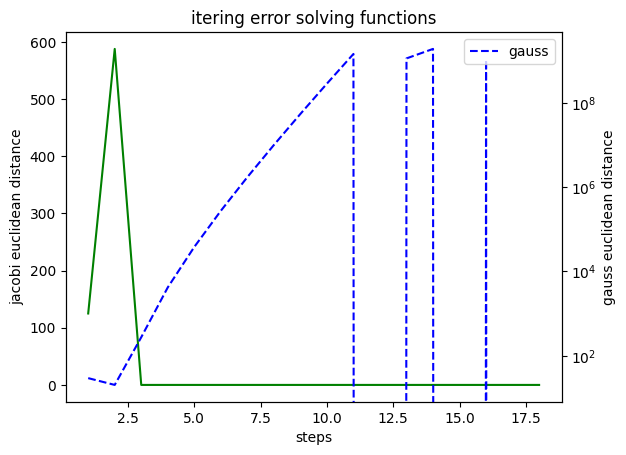

In [43]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1,len(jacobi_middle_distance),len(jacobi_middle_distance))
fig,ax1=plt.subplots()
ax2 = ax1.twinx()


ax1.plot(x,jacobi_middle_distance,'g-',label = 'jacobi')
ax2.semilogy(x,gauss_middle_distance,'b--',label = 'gauss')

ax1.set_xlabel("steps")
ax1.set_ylabel("jacobi euclidean distance")
ax2.set_ylabel("gauss euclidean distance")
plt.title(r"itering error solving functions")
plt.legend(loc = 'upper right')
plt.show()